In [37]:
import os
import keras

from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.applications import EfficientNetB0
from keras.models import Model

In [38]:
# Load EfficientNetB0 model pre-trained on ImageNet dataset
model = EfficientNetB0(weights='imagenet', include_top=True)

In [39]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_3

In [40]:
# Choose a layer from the model for feature extraction
# Let's use 'top_activation' layer
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("top_activation").output)

In [41]:
feat_extractor.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_3[0][0]'

1/1 [==============================] - 0s 53ms/step


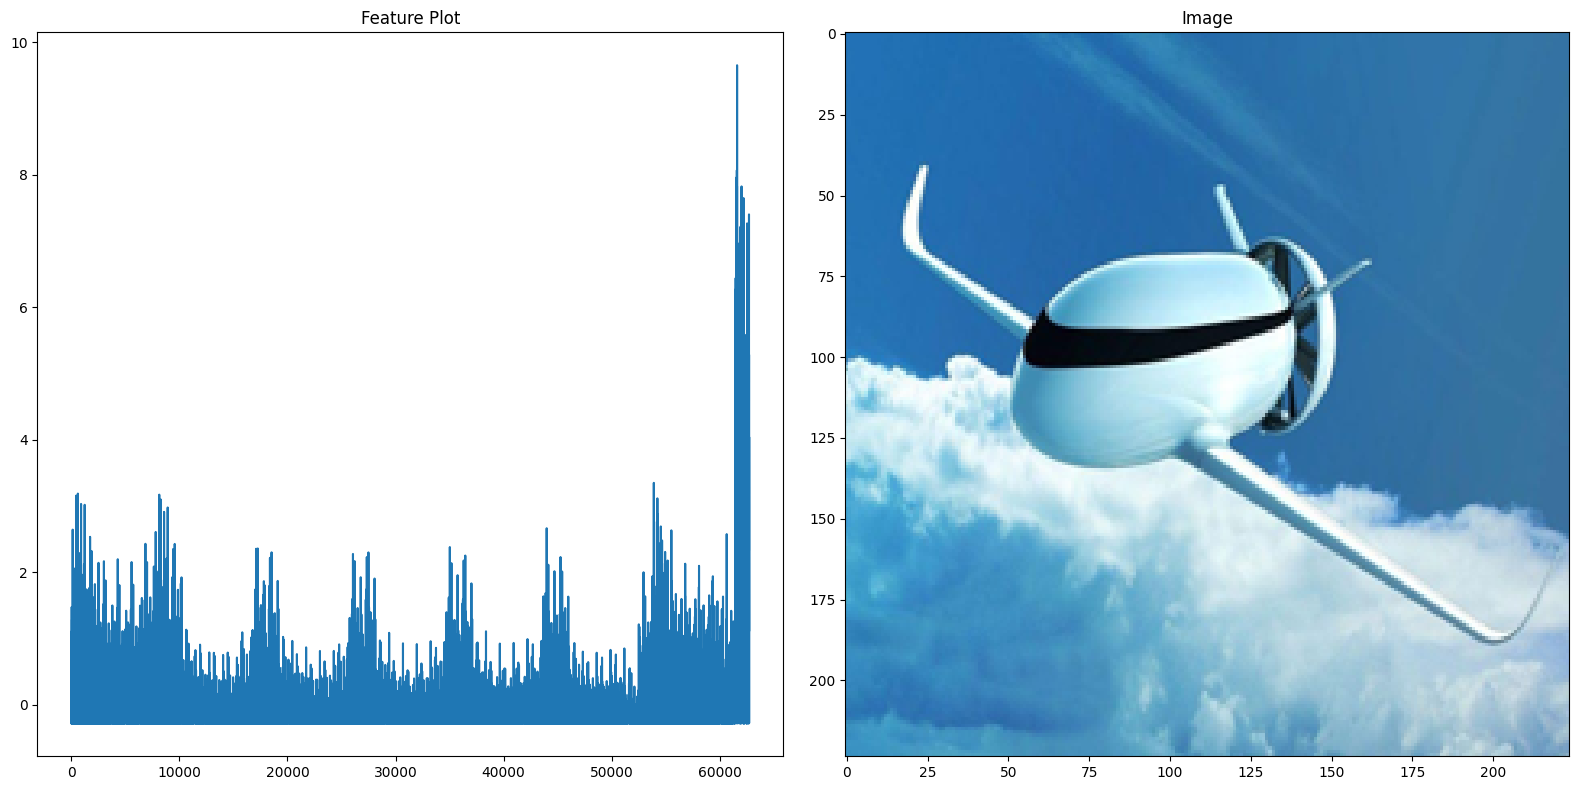

In [46]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize the image if necessary
    x = np.array(img) / 255.0
    x = np.expand_dims(x, axis=0)  # Add batch dimension
    return img, x

# Assuming you have defined feat_extractor and load_image functions

image_path = "./Dataset/download/Planes/4.jpeg"
img, x = load_image(image_path)
feat = feat_extractor.predict(x)
feat_flat = feat.flatten()

plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Create the subplot for the plot of feat[0]
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(feat_flat)
plt.title('Feature Plot')

# Create the subplot for displaying the image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(img)
plt.title('Image')

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


In [48]:
import ReadBuddy as rb
my_reader=rb.ReadBuddy("./Dataset/download/")
_,folder_dict=my_reader.create_folder_dictionary()


In [54]:
features = []
for i in folder_dict:
    
    for image_path in folder_dict[i]:

        img, x = load_image(image_path);
        feat = feat_extractor.predict(x)[0]
        features.append(feat)


1/1 [==============================] - 0s 32ms/step


In [56]:
features = np.array(features)

In [60]:
num_samples = features.shape[0]
num_features = features.shape[1] * features.shape[2] * features.shape[3]
features_2d = features.reshape(num_samples, num_features)

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
pca.fit(features_2d)

PCA(n_components=200)

In [63]:
pca_features = pca.transform(features_2d)

In [73]:
images = [folder_dict[i] for i in folder_dict]

In [76]:
# images is a list of list of string i want to join it


images = [item for sublist in images for item in sublist]
images

['./Dataset/download/Car/12.jpeg',
 './Dataset/download/Car/44.jpeg',
 './Dataset/download/Car/48.jpeg',
 './Dataset/download/Car/14.jpeg',
 './Dataset/download/Car/3.jpeg',
 './Dataset/download/Car/25.jpeg',
 './Dataset/download/Car/1.jpeg',
 './Dataset/download/Car/10.jpeg',
 './Dataset/download/Car/49.jpeg',
 './Dataset/download/Car/27.jpeg',
 './Dataset/download/Car/31.jpeg',
 './Dataset/download/Car/21.jpeg',
 './Dataset/download/Car/20.jpeg',
 './Dataset/download/Car/7.jpeg',
 './Dataset/download/Car/15.jpeg',
 './Dataset/download/Car/42.jpeg',
 './Dataset/download/Car/33.jpeg',
 './Dataset/download/Car/38.jpeg',
 './Dataset/download/Car/34.jpeg',
 './Dataset/download/Car/37.jpeg',
 './Dataset/download/Car/46.jpeg',
 './Dataset/download/Car/0.jpeg',
 './Dataset/download/Car/41.jpeg',
 './Dataset/download/Car/30.jpeg',
 './Dataset/download/Car/13.jpeg',
 './Dataset/download/Car/43.jpeg',
 './Dataset/download/Car/22.jpeg',
 './Dataset/download/Car/4.jpeg',
 './Dataset/download/Car/

In [77]:
from scipy.spatial import distance

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

1/1 [==============================] - 0s 38ms/step


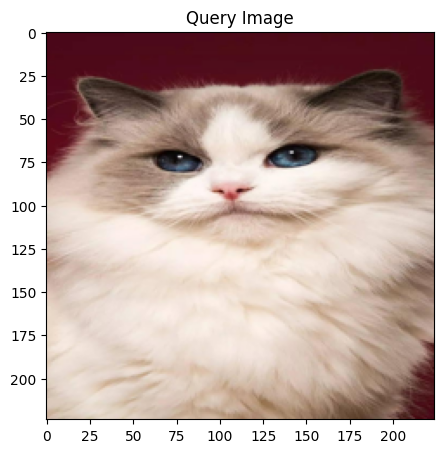

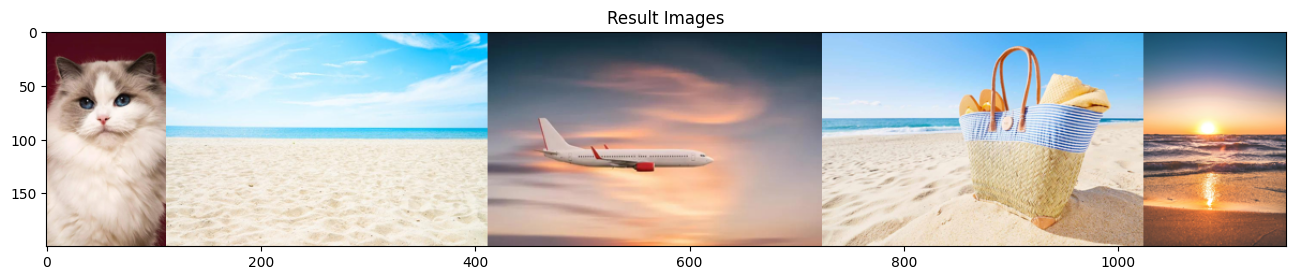

In [88]:
# Load image and extract features
new_image, x = load_image("./Dataset/download/Cat/8.jpeg")
new_features = feat_extractor.predict(x)

# Assuming new_features is a 4D array with shape (1, height, width, num_channels)
# Reshape new_features to 2D array (1, num_features)
num_features = new_features.shape[1] * new_features.shape[2] * new_features.shape[3]
new_features_2d = new_features.reshape(1, num_features)

# Now, apply PCA to the 2D new_features array
new_pca_features = pca.transform(new_features_2d)

# Flatten new_pca_features to make it 1-D
new_pca_features = new_pca_features.flatten()

# Calculate distances to all the other images' PCA feature vectors
distances = [distance.cosine(new_pca_features, feat) for feat in pca_features]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# Display the results
plt.figure(figsize=(5, 15))
plt.imshow(new_image)
plt.title("Query Image")

# Display the resulting images
plt.figure(figsize=(16, 8))
plt.imshow(results_image)
plt.title("Result Images")
plt.show()
